In this package, for a bipartite network, the node type is called "layer". For example, there are two layers for bipartite network, one layer for uni-paritite network.

The network is saved in a csv file as edgelist. In this package, we use the "toy_data.csv" as example.

The layer index of nodes is saved in a csv file. The first column is the nodes; the second column is the node layer index. The layer index should be strings like *'1', '2', '3'* or *'a','b','c'*. **Nodes with different layer index will not be allocated into the same community**. 

In this package, we use the "toy_data_type_2_layer.csv" as the layer index file for bipartite network (network with 2 layers); we use the "toy_data_type_1_layer.csv" as the layer index file for uni-partite network (network with 1 layer); we use the "toy_data_type_3_layer.csv" as the layer index file for tri-partite network (network with 3 layers).

If the layer index file is not provided, the network will be loaded as a bipartite network, with nodes in the first column assigned in first layer and nodes in the second column assigned in second layer.

# pipeline - community detection for bipartite network

this section will present an example for detecting communities for bipartite networks. 

## read graph

In [1]:
import graph_tool.all as gt
import numpy as np
import random
import pandas as pd
import sbm_bipartite

dest="./toy_data.csv"
seed=43
gt.seed_rng(seed) ## seed for graph-tool's random number generator --> same results


In [2]:
model=sbm_bipartite.bipartite_sbm()
model.load_graph(dest)

## find community

In [3]:
model.fit()
print(model.state)
print(model.state.print_summary())

<NestedBlockState object, with base <BlockState object with 220 blocks (46 nonempty), degree-corrected, for graph <Graph object, undirected, with 220 vertices and 110 edges, 2 internal vertex properties, 1 internal edge property, at 0x73b72d1abd10>, at 0x73b72d1a84d0>, and 6 levels of sizes [(220, 46), (46, 12), (12, 6), (6, 4), (4, 2), (2, 1)] at 0x73b669f46d80>
<NestedBlockState object, with base <BlockState object with 220 blocks (46 nonempty), degree-corrected, for graph <Graph object, undirected, with 220 vertices and 110 edges, 2 internal vertex properties, 1 internal edge property, at 0x73b72d1abd10>, at 0x73b6693e4140>, and 6 levels of sizes [(220, 46), (46, 12), (12, 6), (6, 4), (4, 2), (2, 1)] at 0x73b6693e42c0>
l: 0, N: 220, B: 46
l: 1, N: 46, B: 12
l: 2, N: 12, B: 6
l: 3, N: 6, B: 4
l: 4, N: 4, B: 2
l: 5, N: 2, B: 1
None


## draw the bipartite network

In [4]:
size = model.g.new_vp("float")     # creates a VertexPropertyMap of type string
for v in model.g.vertices():
    size[v] = 0.8
    

model.g.vp.size = size

In [5]:
eweight = model.g.new_ep("double")

for e in model.g.edges():
    eweight[e]=0.5

In [6]:
nedges=1000
hide_hierarchy=0
h_v_size=7.0
h_e_size=2.0
file="/home/simone/Downloads/prova6.pdf"

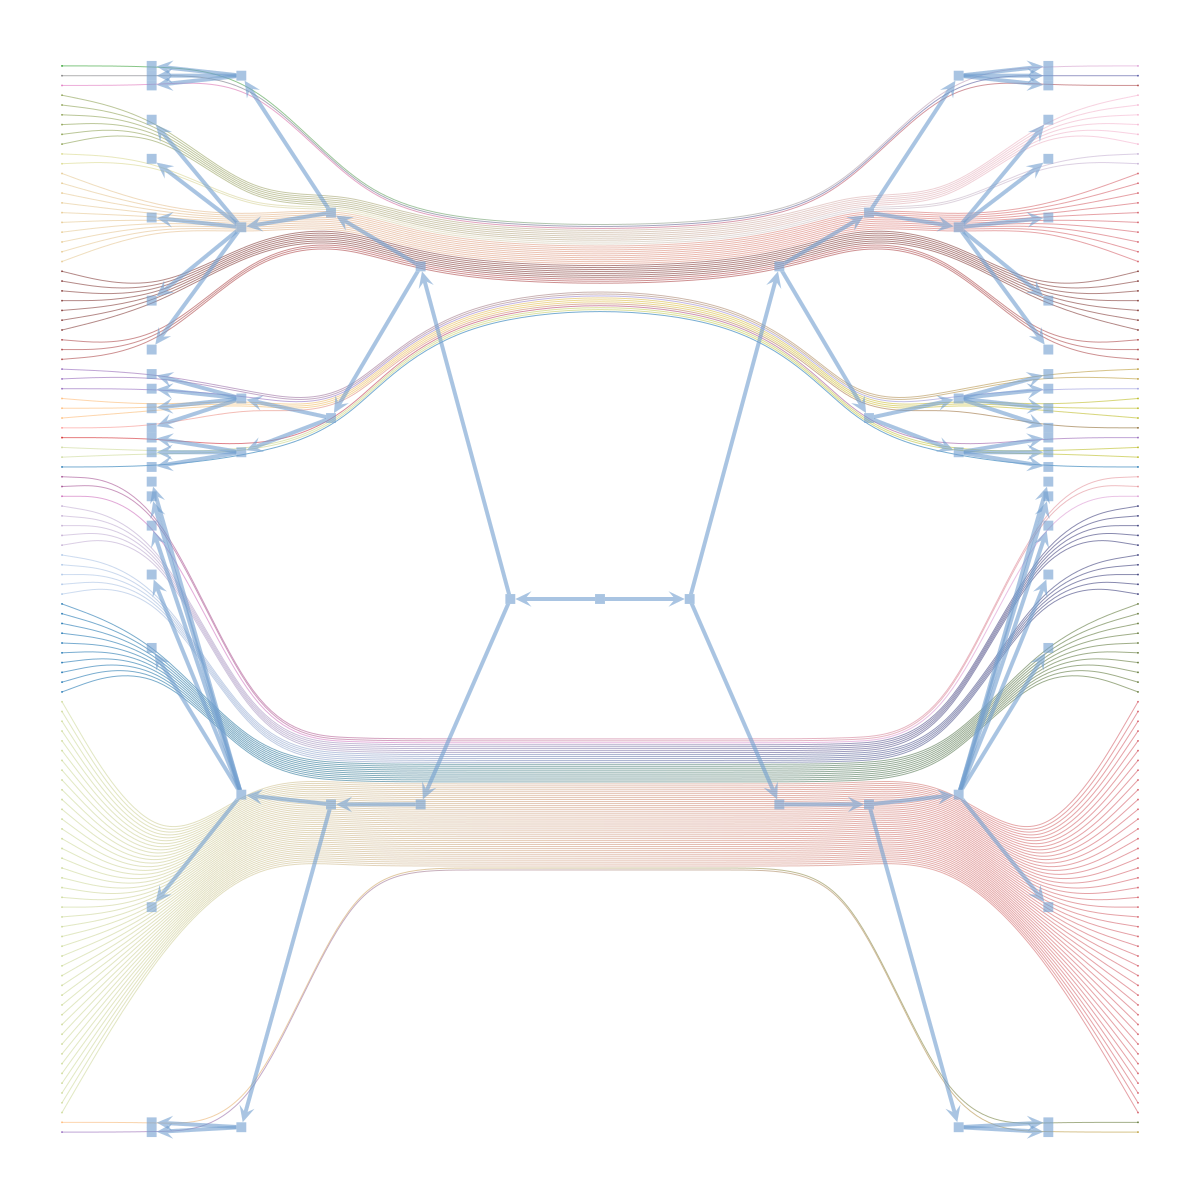

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x73b72d1abd10, at 0x73b66a64a630>,
 <GraphView object, directed, with 291 vertices and 290 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x73b668e72e70, at 0x73b668e57ce0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x73b668e72e70, at 0x73b668e542c0>, False), at 0x73b668e72e70>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x73b668e72e70, at 0x73b72d1a84d0>)

In [7]:
'''
        Plot the graph and group structure.
        optional:
        - filename, str; where to save the plot. if None, will not be saved
        - nedges, int; subsample  to plot (faster, less memory)
        - hide_h, int; wether or not to hide the hierarchy
        - h_v_size, float; size of hierarchical vertices
        - h_e_size, float; size of hierarchical edges
        - **kwargs; keyword arguments passed to self.state.draw method (https://graph-tool.skewed.de/static/doc/draw.html#graph_tool.draw.draw_hierarchy)
        '''
model.state.draw(layout='bipartite', #vertex_text=g.vp.name,# output=filename,
                        vertex_size=size,
                        edge_pen_width=eweight,
                        subsample_edges=nedges, hshortcuts=1, hide=hide_hierarchy,
                        hvprops={'size':h_v_size},
                        heprops={'pen_width':h_e_size},
                        #output=file
                       )

## save the model

In [8]:
model.save_model('example')

# get the probability of nodes belonging to one community

In [9]:
dest='toy_data.csv'
seed=43
gt.seed_rng(seed) ## seed for graph-tool's random number generator --> same results
np.random.seed(43)

model1=sbm_bipartite.bipartite_sbm()
model1.load_graph(dest)
model1.fit()
model1.state

model1.state.print_summary()

<NestedBlockState object, with base <BlockState object with 220 blocks (46 nonempty), degree-corrected, for graph <Graph object, undirected, with 220 vertices and 110 edges, 2 internal vertex properties, 1 internal edge property, at 0x73b668ea4b00>, at 0x73b668e71a60>, and 6 levels of sizes [(220, 46), (46, 12), (12, 6), (6, 4), (4, 2), (2, 1)] at 0x73b66d814050>
l: 0, N: 220, B: 46
l: 1, N: 46, B: 12
l: 2, N: 12, B: 6
l: 3, N: 6, B: 4
l: 4, N: 4, B: 2
l: 5, N: 2, B: 1


In [10]:
# there will be a mcmc process; the results of communities of nodes could be changed compare to the results before.
# for each node, its community is the one with the highest probability
# force_niter: the sample generated from the model community results by mcmc process
# niter: the number of nodes moved in each step

model1.get_max_nested_from_mcmc(force_niter = 1000, niter = 10)

In [12]:
model1.pv

{'c_1010185': array([997,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1], dtype=int32),
 'p_1447969': array([  0, 997,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1], dtype=int32),
 'c_355461': array([  0,   0, 999], dtype=int32),
 'p_983872': array([  0,   0,   0, 999], dtype=int32),
 'c_278013': array([  0,   0,   0,   0, 999], dtype=int32),
 'p_940111': array([  0,   0,   0,   0,   0, 999], dtype=int32),
 'c_100976': array([994,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   4], dtype=int32),
 'p_405195': array([  0, 992,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   

In [11]:
# the probability of nodes belonging to its community. Only the highest one is kept.
model1.prob

{'c_1010185': 0.997997997997998,
 'p_1447969': 0.997997997997998,
 'c_355461': 1.0,
 'p_983872': 1.0,
 'c_278013': 1.0,
 'p_940111': 1.0,
 'c_100976': 0.994994994994995,
 'p_405195': 0.992992992992993,
 'c_1635': 1.0,
 'p_257259': 1.0,
 'c_77250': 1.0,
 'p_435634': 1.0,
 'c_161623': 0.994994994994995,
 'p_1354052': 0.997997997997998,
 'c_1421035': 0.998998998998999,
 'p_2309091': 0.997997997997998,
 'c_46727': 0.997997997997998,
 'p_298370': 0.997997997997998,
 'c_1248154': 0.998998998998999,
 'p_1867552': 0.998998998998999,
 'c_345518': 1.0,
 'p_645950': 1.0,
 'c_13767': 1.0,
 'p_986739': 1.0,
 'c_14567': 0.978978978978979,
 'p_3142': 0.980980980980981,
 'c_33272': 1.0,
 'p_1817404': 1.0,
 'c_164345': 1.0,
 'p_971684': 1.0,
 'c_314262': 0.9819819819819819,
 'p_106623': 0.982982982982983,
 'c_124085': 0.993993993993994,
 'p_12587847': 0.991991991991992,
 'c_49201': 1.0,
 'p_195214': 1.0,
 'c_111983': 1.0,
 'p_1019262': 1.0,
 'c_9886': 0.974974974974975,
 'p_53793': 0.973973973973974,
 